In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explore Dataset

In [4]:
dataset = pd.read_csv("news.csv")
dataset.head(3)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL


In [5]:
dataset.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
dataset.shape

(6335, 4)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [11]:
dataset["text"] = dataset["text"]+" "+dataset["title"]
dataset.drop(columns=["title"])

,Unnamed: 0,text,label
0,8476,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,4490,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


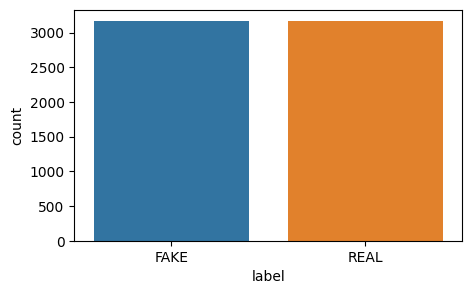

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x="label", data=dataset, palette="tab10", hue="label")
plt.show()

# Spliting Dataset

In [13]:
x = dataset["text"]
y = dataset["label"]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# CONVERTING TEXT DATA INTO NUMERIC

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Apply Model

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(tfidf_train, y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(tfidf_test)

# Check Model

In [21]:
from sklearn.metrics import accuracy_score 

accuracy_s = accuracy_score(y_test, y_pred)
accuracy_s*100

91.23914759273876

Confusion Matrix:
[[585  43]
 [ 68 571]]


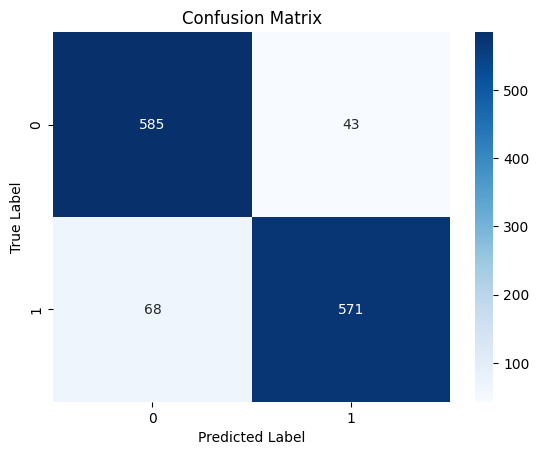

In [22]:
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_m)

# Visualize the confusion matrix
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.93      0.91       628
        REAL       0.93      0.89      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

